In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/crop-recommendation/Crop_recommendation.csv


# Reading data

In [94]:
proposal_data = pd.read_csv('/kaggle/input/crop-recommendation/Crop_recommendation.csv')
proposal_data.head(6)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,NaN,NaN


# Dimensions of data

In [95]:
proposal_data.shape

(2200, 10)

Data looks as expected and original data contains 2200 observations and 10 variables.

# Checking datatypes of data

In [96]:
proposal_data.dtypes


Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
Unnamed: 8     float64
Unnamed: 9     float64
dtype: object

# Checking null values

In [97]:
proposal_data.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

# Deleting Extra columns


In [98]:
del proposal_data["Unnamed: 8"]

In [99]:
del proposal_data["Unnamed: 9"]

In [100]:
proposal_data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



From above we can see only one categorical variable.


# Summarizing data 

In [101]:
proposal_data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [102]:
grouped_data = proposal_data.groupby("label").size().reset_index(name="count")

# Display the result
print(grouped_data)

          label  count
0         apple    100
1        banana    100
2     blackgram    100
3      chickpea    100
4       coconut    100
5        coffee    100
6        cotton    100
7        grapes    100
8          jute    100
9   kidneybeans    100
10       lentil    100
11        maize    100
12        mango    100
13    mothbeans    100
14     mungbean    100
15    muskmelon    100
16       orange    100
17       papaya    100
18   pigeonpeas    100
19  pomegranate    100
20         rice    100
21   watermelon    100


# Exploratory data Analysis

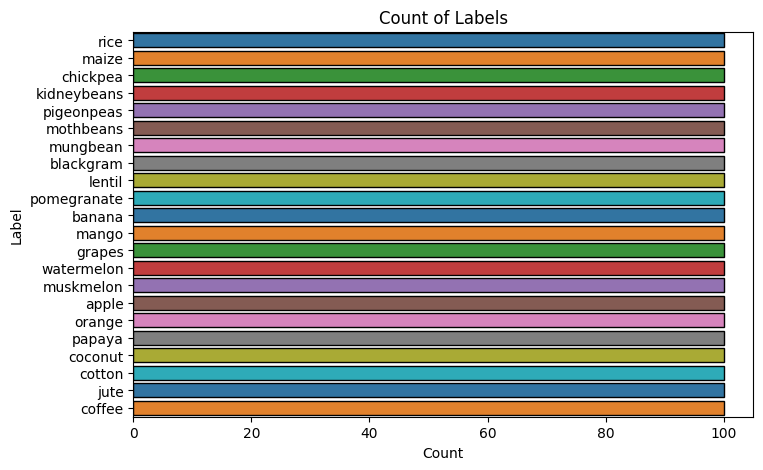

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(8, 5))

# Create bar plot
sns.countplot(data=proposal_data, y="label", palette="tab10", edgecolor="black")

# Labels and title
plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Count of Labels")

# Show plot
plt.show()

From above, we can see count of samples collected for each crop.

In [104]:
# Group by 'label' and calculate mean for each column
SETA = proposal_data.groupby("label", observed=True).agg(
    mean_N=("Nitrogen", "mean"),
    mean_ph=("ph", "mean"),
    mean_T=("temperature", "mean"),
    mean_P=("phosphorus", "mean"),  
    mean_K=("potassium", "mean"),
    mean_R=("rainfall", "mean"),
    mean_H=("humidity", "mean")
).reset_index()

# Print the result
print(SETA)

          label  mean_N   mean_ph     mean_T  mean_P  mean_K      mean_R  \
0         apple   20.80  5.929663  22.630942  134.22  199.89  112.654779   
1        banana  100.23  5.983893  27.376798   82.01   50.05  104.626980   
2     blackgram   40.02  7.133952  29.973340   67.47   19.24   67.884151   
3      chickpea   40.09  7.336957  18.872847   67.79   79.92   80.058977   
4       coconut   21.98  5.976562  27.409892   16.93   30.59  175.686646   
5        coffee  101.20  6.790308  25.540477   28.74   29.94  158.066295   
6        cotton  117.77  6.912675  23.988958   46.24   19.56   80.398043   
7        grapes   23.18  6.025937  23.849575  132.53  200.11   69.611829   
8          jute   78.40  6.732778  24.958376   46.86   39.99  174.792798   
9   kidneybeans   20.75  5.749411  20.115085   67.54   20.05  105.919778   
10       lentil   18.77  6.927932  24.509052   68.36   19.41   45.680454   
11        maize   77.76  6.245190  22.389204   48.44   19.79   84.766988   
12        ma

In [105]:
# Pivot the data to long format
pivoted_data = SETA.melt(
    id_vars=["label"],  # Keep 'label' as identifier
    value_vars=["mean_N", "mean_ph", "mean_T", "mean_P", "mean_K", "mean_R", "mean_H"],  # Columns to pivot
    var_name="land_condition",  # New column for variable names
    value_name="Amount"  # New column for values
)
# Print the result
print(pivoted_data)


           label land_condition      Amount
0          apple         mean_N   20.800000
1         banana         mean_N  100.230000
2      blackgram         mean_N   40.020000
3       chickpea         mean_N   40.090000
4        coconut         mean_N   21.980000
..           ...            ...         ...
149       papaya         mean_H   92.403388
150   pigeonpeas         mean_H   48.061633
151  pomegranate         mean_H   90.125504
152         rice         mean_H   82.272822
153   watermelon         mean_H   85.160375

[154 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

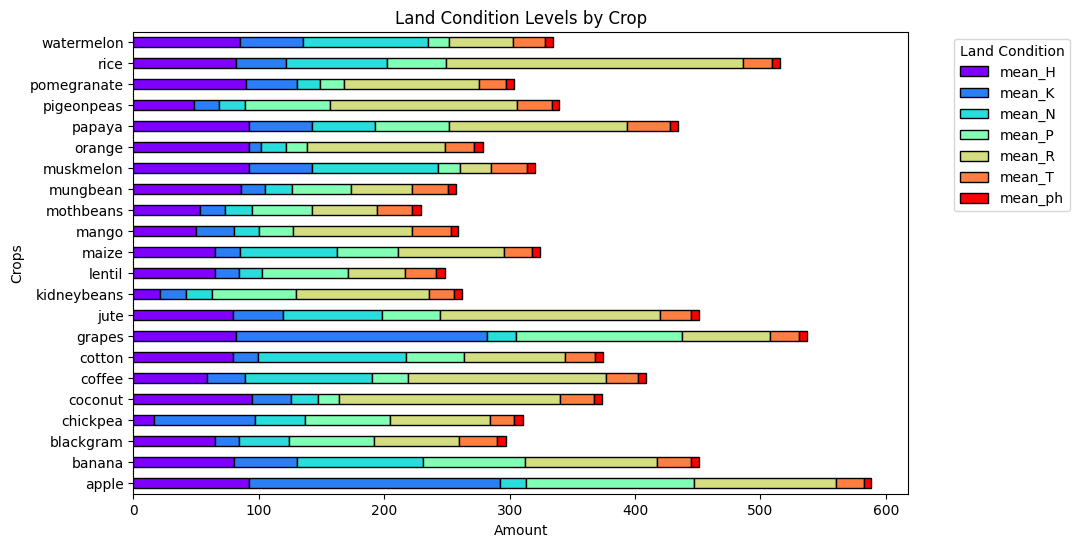

In [106]:
# Set figure size
plt.figure(figsize=(10, 6))

# Pivot the data for a stacked bar plot
pivot_table = pivoted_data.pivot(index="label", columns="land_condition", values="Amount")

# Create a stacked horizontal bar chart
pivot_table.plot(kind="barh", stacked=True, colormap="rainbow", edgecolor="black", figsize=(10, 6))

# Labels and title
plt.ylabel("Crops")
plt.xlabel("Amount")
plt.title("Land Condition Levels by Crop")

# Adjust legend position
plt.legend(title="Land Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In the above visual representation, We can clearly see land condition of each crop, all conditions for a crop to grow healthily are showed with amount by differentiating each condition with colour.Each bar above represents a condition.

# Relationship between variables

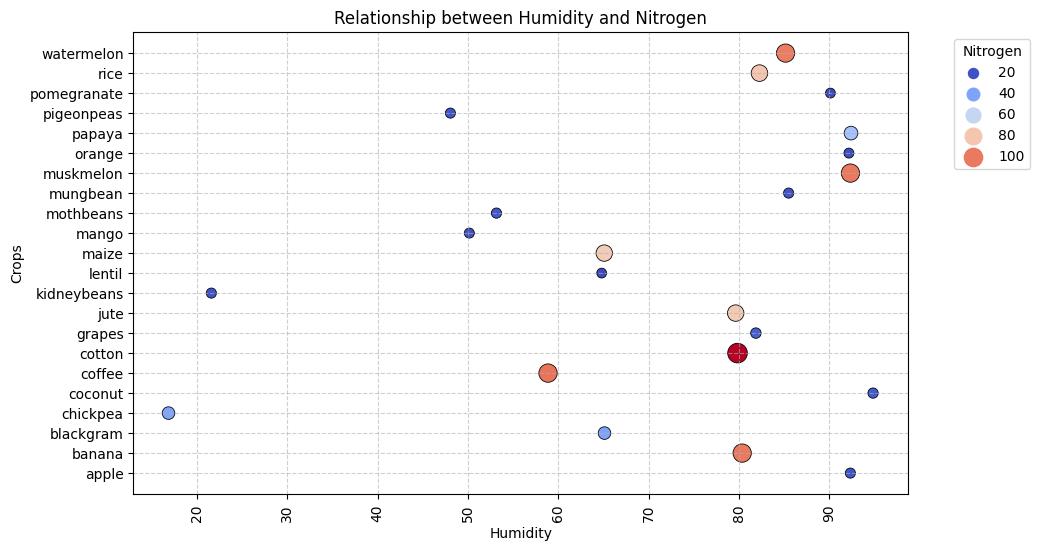

In [107]:
# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=SETA, x="mean_H", y="label", hue="mean_N", palette="coolwarm", size="mean_N", sizes=(50, 200), edgecolor="black")

# Labels and title
plt.xlabel("Humidity")
plt.ylabel("Crops")
plt.title("Relationship between Humidity and Nitrogen")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Flip coordinates (similar to coord_flip in ggplot)
plt.gca().invert_yaxis()  # Invert y-axis to mimic coord_flip
plt.grid(True, linestyle="--", alpha=0.6) 
plt.legend(title="Nitrogen", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the above visual representation we can say there is no proper relation between nitrogen and humidity. In some cases where nitrogen percentage is high in land humidity is more.

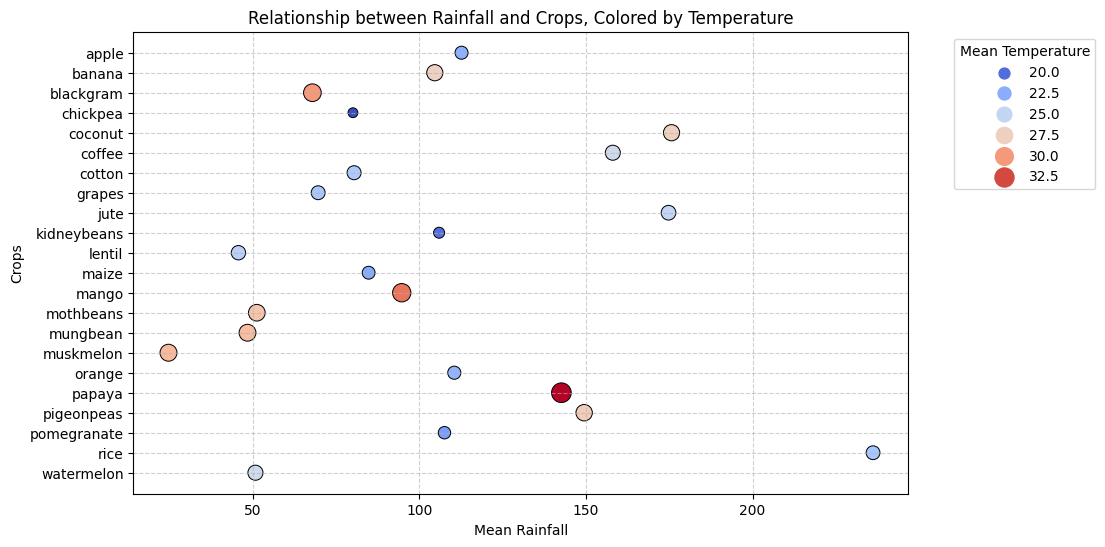

In [108]:
# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot (Rainfall vs. Crops, colored by Temperature)
sns.scatterplot(data=SETA, x="mean_R", y="label", hue="mean_T", palette="coolwarm", size="mean_T", sizes=(50, 200), edgecolor="black")

# Labels and title
plt.xlabel("Mean Rainfall")
plt.ylabel("Crops")
plt.title("Relationship between Rainfall and Crops, Colored by Temperature")

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Adjust legend placement
plt.legend(title="Mean Temperature", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Above graph is plotted to understand the relation between rainfall and temperature, whether temperature is high or low, certain amount of rainfall is needed for each crop.so we can say there is no relation between temperature and rainfall.

In [146]:
# Define the list of crops to filter
selected_crops_F = ["apple", "banana", "blackgram", "chickpea", "coconut", "coffee", 
                  "cotton", "grapes", "jute", "kidneybeans", "lentil"]

# Filter the dataset
subsetF = SETA[SETA["label"].isin(selected_crops_F)]

# Display the subset
print(subsetF)

          label  mean_N   mean_ph     mean_T  mean_P  mean_K      mean_R  \
0         apple   20.80  5.929663  22.630942  134.22  199.89  112.654779   
1        banana  100.23  5.983893  27.376798   82.01   50.05  104.626980   
2     blackgram   40.02  7.133952  29.973340   67.47   19.24   67.884151   
3      chickpea   40.09  7.336957  18.872847   67.79   79.92   80.058977   
4       coconut   21.98  5.976562  27.409892   16.93   30.59  175.686646   
5        coffee  101.20  6.790308  25.540477   28.74   29.94  158.066295   
6        cotton  117.77  6.912675  23.988958   46.24   19.56   80.398043   
7        grapes   23.18  6.025937  23.849575  132.53  200.11   69.611829   
8          jute   78.40  6.732778  24.958376   46.86   39.99  174.792798   
9   kidneybeans   20.75  5.749411  20.115085   67.54   20.05  105.919778   
10       lentil   18.77  6.927932  24.509052   68.36   19.41   45.680454   

       mean_H  
0   92.333383  
1   80.358123  
2   65.118426  
3   16.860439  
4   94.

In [110]:
# Define the list of crops for subsetG
selected_crops_G = ["maize", "mango", "mothbeans", "mungbean", "muskmelon", 
                    "orange", "papaya", "pigeonpeas", "pomegranate", "rice", "watermelon"]

# Filter the dataset
subsetG = SETA[SETA["label"].isin(selected_crops_G)]

# Display the subset
print(subsetG)

          label  mean_N   mean_ph     mean_T  mean_P  mean_K      mean_R  \
11        maize   77.76  6.245190  22.389204   48.44   19.79   84.766988   
12        mango   20.07  5.766373  31.208770   27.18   29.92   94.704515   
13    mothbeans   21.44  6.831174  28.194920   48.01   20.23   51.198487   
14     mungbean   20.99  6.723957  28.525775   47.28   19.87   48.403601   
15    muskmelon  100.32  6.358805  28.663066   17.72   50.08   24.689952   
16       orange   19.58  7.016957  22.765725   16.55   10.01  110.474969   
17       papaya   49.88  6.741442  33.723859   59.05   50.04  142.627839   
18   pigeonpeas   20.73  5.794175  27.741762   67.73   20.29  149.457564   
19  pomegranate   18.87  6.429172  21.837842   18.75   40.21  107.528442   
20         rice   79.89  6.425471  23.689332   47.58   39.87  236.181114   
21   watermelon   99.42  6.495778  25.591767   17.00   50.22   50.786219   

       mean_H  
11  65.092249  
12  50.156573  
13  53.160418  
14  85.499975  
15  92.

In [142]:
# Pivot subsetF into long format
pivoted_dataA = subsetF.melt(id_vars=["label"], var_name="land_condition", value_name="Amount")

# Display the pivoted DataFrame
print(pivoted_dataA)

          label land_condition      Amount
0         apple         mean_N   20.800000
1        banana         mean_N  100.230000
2     blackgram         mean_N   40.020000
3      chickpea         mean_N   40.090000
4       coconut         mean_N   21.980000
..          ...            ...         ...
72       cotton         mean_H   79.843474
73       grapes         mean_H   81.875228
74         jute         mean_H   79.639864
75  kidneybeans         mean_H   21.605357
76       lentil         mean_H   64.804785

[77 rows x 3 columns]


In [114]:
# Pivot subsetG into long format
pivoted_dataB = subsetG.melt(id_vars=["label"], var_name="land_condition", value_name="Amount")

# Display the pivoted DataFrame
print(pivoted_dataB)


          label land_condition      Amount
0         maize         mean_N   77.760000
1         mango         mean_N   20.070000
2     mothbeans         mean_N   21.440000
3      mungbean         mean_N   20.990000
4     muskmelon         mean_N  100.320000
..          ...            ...         ...
72       papaya         mean_H   92.403388
73   pigeonpeas         mean_H   48.061633
74  pomegranate         mean_H   90.125504
75         rice         mean_H   82.272822
76   watermelon         mean_H   85.160375

[77 rows x 3 columns]


<Figure size 1200x800 with 0 Axes>

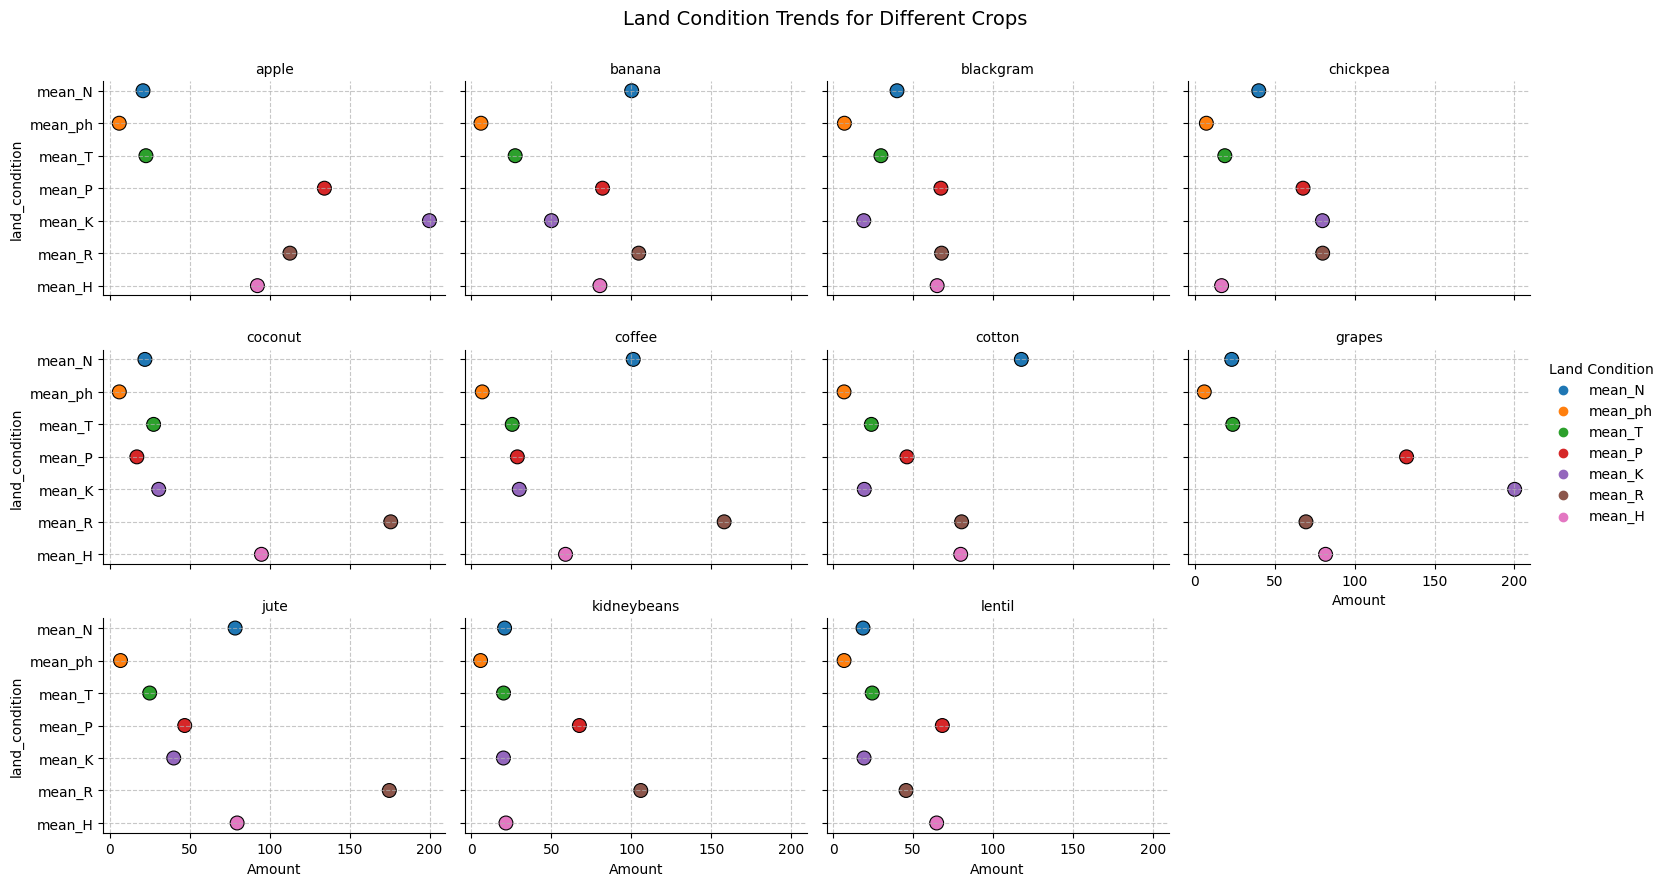

In [143]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create FacetGrid
g = sns.FacetGrid(pivoted_dataA, col="label", col_wrap=4, height=3, aspect=1.3, sharex=True, sharey=True)

# Increase dot size using 's' parameter
g.map_dataframe(sns.scatterplot, x="Amount", y="land_condition", hue="land_condition", s=100, edgecolor="black")

# Enable grid for better readability
for ax in g.axes.flat:
    ax.grid(True, linestyle="--", alpha=0.7)

# Adjust titles and layout
g.set_titles("{col_name}")
g.add_legend(title="Land Condition")

# Improve overall layout and spacing
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Land Condition Trends for Different Crops", fontsize=14)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

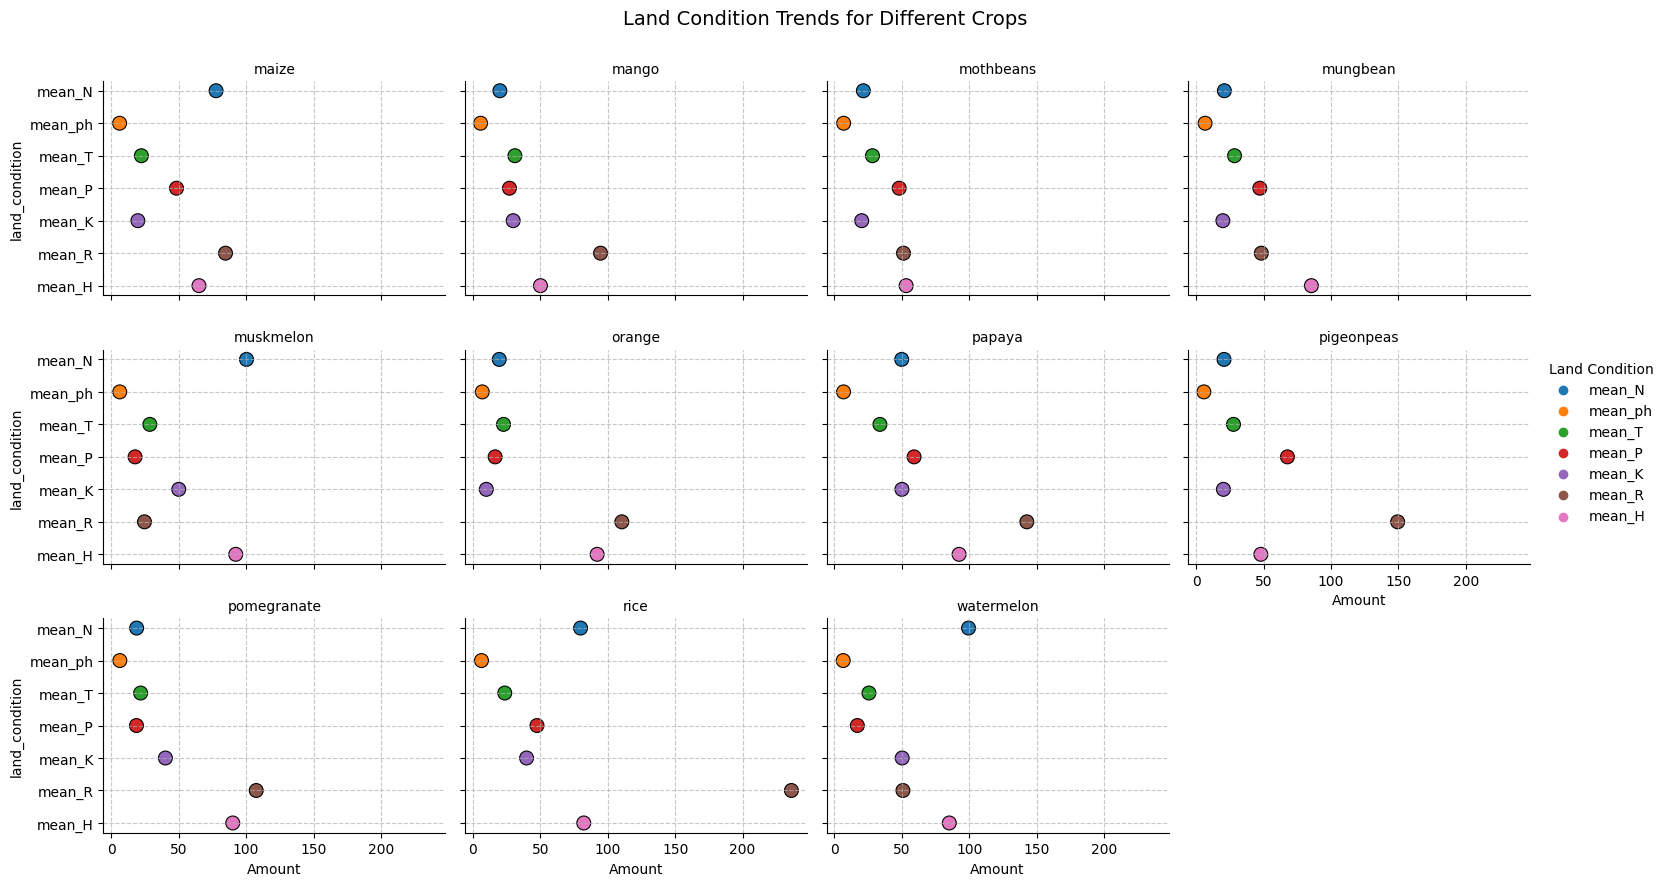

In [127]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create FacetGrid
g = sns.FacetGrid(pivoted_dataB, col="label", col_wrap=4, height=3, aspect=1.3, sharex=True, sharey=True)

# Increase dot size using 's' parameter
g.map_dataframe(sns.scatterplot, x="Amount", y="land_condition", hue="land_condition", s=100, edgecolor="black")

# Enable grid for better readability
for ax in g.axes.flat:
    ax.grid(True, linestyle="--", alpha=0.7)

# Adjust titles and layout
g.set_titles("{col_name}")
g.add_legend(title="Land Condition")

# Improve overall layout and spacing
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Land Condition Trends for Different Crops", fontsize=14)

# Show the plot
plt.show()

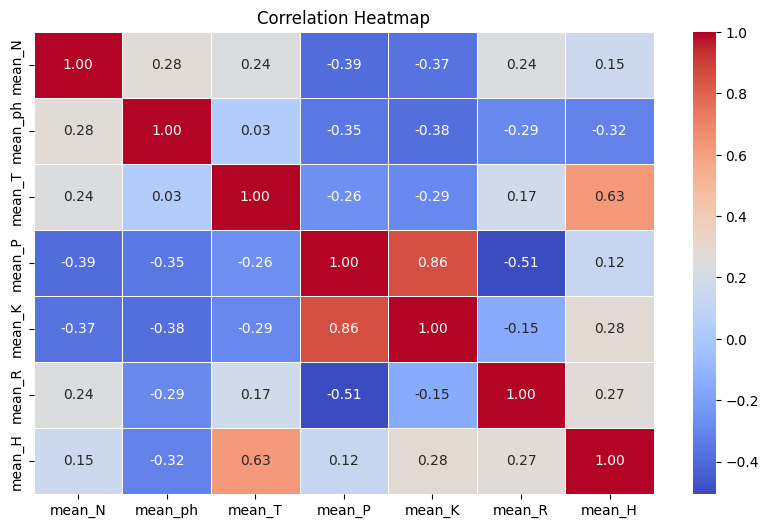

In [151]:
numeric_data = subsetF.drop(columns=["label"])
# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows the relationships between soil and climate variables, where red indicates strong positive correlation and blue represents negative correlation. Notably, phosphorus (P) and potassium (K) have a strong positive correlation (0.86), while rainfall (R) negatively correlates with phosphorus (-0.51).

# Principal Component Analysis

In [159]:
from sklearn.preprocessing import StandardScaler

# Assume proposal_data is already a Pandas DataFrame
new_data = proposal_data.iloc[:, 0:7]  # Select first 7 columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

# Convert back to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=new_data.columns)

# Display first few rows
print(scaled_df.head())

   Nitrogen  phosphorus  potassium  temperature  humidity        ph  rainfall
0  1.068797   -0.344551  -0.101688    -0.935587  0.472666  0.043302  1.810361
1  0.933329    0.140616  -0.141185    -0.759646  0.397051  0.734873  2.242058
2  0.255986    0.049647  -0.081939    -0.515898  0.486954  1.771510  2.921066
3  0.635298   -0.556811  -0.160933     0.172807  0.389805  0.660308  2.537048
4  0.743673   -0.344551  -0.121436    -1.083647  0.454792  1.497868  2.898373


In [160]:
# Convert DataFrame to a NumPy matrix
Data_A = new_data.to_numpy()  # Equivalent to as.matrix(new_data)

# Compute the covariance matrix
CovarianceMatrix = np.cov(Data_A, rowvar=False)  # rowvar=False ensures columns are treated as variables

# Convert to DataFrame for better readability
CovarianceMatrix_df = pd.DataFrame(CovarianceMatrix, index=new_data.columns, columns=new_data.columns)

# Print Covariance Matrix
print("Covariance Matrix:")
print(CovarianceMatrix_df)

Covariance Matrix:
                Nitrogen   phosphorus    potassium  temperature    humidity  \
Nitrogen     1362.889537  -281.860096  -262.727147     4.954622  156.730700   
phosphorus   -281.860096  1088.068460  1229.998647   -21.303478  -87.197323   
potassium    -262.727147  1229.998647  2565.212869   -41.134229  215.215502   
temperature     4.954622   -21.303478   -41.134229    25.641550   23.147400   
humidity      156.730700   -87.197323   215.215502    23.147400  495.677307   
ph              2.762395    -3.523487    -6.644240    -0.069739   -0.146161   
rainfall      119.747146  -115.730685  -148.811212    -8.372180  115.534462   

                   ph     rainfall  
Nitrogen     2.762395   119.747146  
phosphorus  -3.523487  -115.730685  
potassium   -6.644240  -148.811212  
temperature -0.069739    -8.372180  
humidity    -0.146161   115.534462  
ph           0.598980    -4.639202  
rainfall    -4.639202  3020.424469  


Covariance of vectors is calcualted to observe how one variable differe from another, that is to observe the relation between one value and other value. Here, I observed both positive and negative covariances in data

In [161]:
CorrelationMatrix_df = new_data.corr()
print(CorrelationMatrix_df)

             Nitrogen  phosphorus  potassium  temperature  humidity        ph  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
ph           0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
Nitrogen     0.059020  
phosphorus  -0.063839  
potassium   -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


In [162]:
# Transpose the covariance matrix
transversecov = CovarianceMatrix_df.T  # Equivalent to t(CovarianceMatrix) in R

# Print the transposed covariance matrix
print("Transposed Covariance Matrix:")
print(transversecov)

Transposed Covariance Matrix:
                Nitrogen   phosphorus    potassium  temperature    humidity  \
Nitrogen     1362.889537  -281.860096  -262.727147     4.954622  156.730700   
phosphorus   -281.860096  1088.068460  1229.998647   -21.303478  -87.197323   
potassium    -262.727147  1229.998647  2565.212869   -41.134229  215.215502   
temperature     4.954622   -21.303478   -41.134229    25.641550   23.147400   
humidity      156.730700   -87.197323   215.215502    23.147400  495.677307   
ph              2.762395    -3.523487    -6.644240    -0.069739   -0.146161   
rainfall      119.747146  -115.730685  -148.811212    -8.372180  115.534462   

                   ph     rainfall  
Nitrogen     2.762395   119.747146  
phosphorus  -3.523487  -115.730685  
potassium   -6.644240  -148.811212  
temperature -0.069739    -8.372180  
humidity    -0.146161   115.534462  
ph           0.598980    -4.639202  
rainfall    -4.639202  3020.424469  


In [164]:
# Perform matrix multiplication
Orthogonal_check = CovarianceMatrix_df @ transversecov  # Equivalent to %*% in R

# Print result
print("Orthogonal Check Matrix:")
print(Orthogonal_check)

Orthogonal Check Matrix:
                 Nitrogen    phosphorus     potassium    temperature  \
Nitrogen     2.044875e+06 -1.041621e+06 -1.363018e+06   26316.496972   
phosphorus  -1.041621e+06  2.797698e+06  4.566939e+06  -76766.680433   
potassium   -1.363018e+06  4.566939e+06  8.232438e+06 -127849.745086   
temperature  2.631650e+04 -7.676668e+04 -1.278497e+05    3433.800744   
humidity     2.732782e+05  6.857677e+04  4.921770e+05    4881.335087   
ph           5.926462e+03 -1.223579e+04 -2.144573e+04     395.681847   
rainfall     6.146594e+05 -7.021478e+05 -9.797749e+05  -13647.563749   

                  humidity            ph      rainfall  
Nitrogen     273278.179130   5926.461701  6.146594e+05  
phosphorus    68576.766747 -12235.792482 -7.021478e+05  
potassium    492177.013392 -21445.733219 -9.797749e+05  
temperature    4881.335087    395.681847 -1.364756e+04  
humidity     338065.625641  -1299.891007  4.028708e+05  
ph            -1299.891007     86.098910 -1.230414e+04  

In [165]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(CovarianceMatrix_df)

# Print eigenvalues
print("Eigenvalues of Covariance Matrix:")
print(eigenvalues)

# Print eigenvectors
print("\nEigenvectors of Covariance Matrix:")
print(eigenvectors)

Eigenvalues of Covariance Matrix:
[3.43445771e+03 2.93305178e+03 1.34900697e+03 5.66260449e+02
 2.52160060e+02 2.30089439e+01 5.67262037e-01]

Eigenvectors of Covariance Matrix:
[[-1.80735334e-01  2.82311880e-02  9.46431143e-01  2.65676499e-01
   1.35176020e-02 -6.06065494e-03 -1.53979104e-03]
 [ 4.40880097e-01 -2.07408888e-01 -5.71901433e-02  5.60180854e-01
  -6.67049900e-01  2.40292618e-02 -1.32410562e-04]
 [ 7.58764968e-01 -3.93266840e-01  2.14289728e-01 -2.27218295e-01
   4.13334754e-01 -3.48544113e-02  2.86817843e-03]
 [-1.09802132e-02  9.16315695e-03  2.16221770e-03 -3.49757509e-02
  -7.55585928e-02 -9.96377177e-01  9.53488194e-03]
 [ 1.53158716e-02 -6.77157744e-02  2.24545325e-01 -7.49365296e-01
  -6.14766109e-01  7.26074447e-02 -1.35599691e-03]
 [-1.46690093e-03  2.58222604e-03  1.24259832e-03  3.89223307e-04
  -1.40102109e-03  9.70423099e-03  9.99946673e-01]
 [-4.43709263e-01 -8.92664376e-01 -6.81943466e-02  3.48346648e-02
   1.91743213e-02 -6.12712818e-03  1.81178269e-03]]


Calculating eigen value for covariance, from that we can see eigen composition is divided in to values and vectors

In [166]:
# Compute eigenvalues
eigenvalues, _ = np.linalg.eig(CovarianceMatrix_df)

# Check if any eigenvalues are NaN
nan_check = np.isnan(eigenvalues)

# Print result
print("Are there any NaN values in the eigenvalues?")
print(nan_check)

Are there any NaN values in the eigenvalues?
[False False False False False False False]


In [167]:
print("Eigenvalues of the Covariance Matrix:")
print(eigenvalues)

Eigenvalues of the Covariance Matrix:
[3.43445771e+03 2.93305178e+03 1.34900697e+03 5.66260449e+02
 2.52160060e+02 2.30089439e+01 5.67262037e-01]


In [168]:
# Compute eigenvectors
_, eigenvectors = np.linalg.eig(CovarianceMatrix_df)

# Print eigenvectors
print("Eigenvectors of the Covariance Matrix:")
print(eigenvectors)

Eigenvectors of the Covariance Matrix:
[[-1.80735334e-01  2.82311880e-02  9.46431143e-01  2.65676499e-01
   1.35176020e-02 -6.06065494e-03 -1.53979104e-03]
 [ 4.40880097e-01 -2.07408888e-01 -5.71901433e-02  5.60180854e-01
  -6.67049900e-01  2.40292618e-02 -1.32410562e-04]
 [ 7.58764968e-01 -3.93266840e-01  2.14289728e-01 -2.27218295e-01
   4.13334754e-01 -3.48544113e-02  2.86817843e-03]
 [-1.09802132e-02  9.16315695e-03  2.16221770e-03 -3.49757509e-02
  -7.55585928e-02 -9.96377177e-01  9.53488194e-03]
 [ 1.53158716e-02 -6.77157744e-02  2.24545325e-01 -7.49365296e-01
  -6.14766109e-01  7.26074447e-02 -1.35599691e-03]
 [-1.46690093e-03  2.58222604e-03  1.24259832e-03  3.89223307e-04
  -1.40102109e-03  9.70423099e-03  9.99946673e-01]
 [-4.43709263e-01 -8.92664376e-01 -6.81943466e-02  3.48346648e-02
   1.91743213e-02 -6.12712818e-03  1.81178269e-03]]


In [169]:
# Compute eigenvalues and eigenvectors of the correlation matrix
eigenvalues_corr, eigenvectors_corr = np.linalg.eig(CorrelationMatrix_df)

# Print eigenvalues
print("Eigenvalues of the Correlation Matrix:")
print(eigenvalues_corr)

# Print eigenvectors
print("\nEigenvectors of the Correlation Matrix:")
print(eigenvectors_corr)

Eigenvalues of the Correlation Matrix:
[1.9312182  0.19298119 1.29391018 0.67656164 0.80592838 1.02289116
 1.07650926]

Eigenvectors of the Correlation Matrix:
[[ 0.30219096 -0.00847289  0.33410693  0.48290443 -0.50778466 -0.54165059
  -0.11204501]
 [-0.64378667 -0.64910438  0.03435809  0.376847    0.08233115 -0.04629318
  -0.10993913]
 [-0.62260719  0.69226847  0.2838292   0.02896707  0.03342452 -0.15486709
  -0.1631733 ]
 [ 0.21242839  0.11128162  0.35948683  0.50041798  0.15486542  0.69082649
  -0.24822796]
 [ 0.06848339 -0.28962403  0.73791663 -0.54787098  0.12887133 -0.0671714
  -0.21359908]
 [ 0.22694272  0.04002786 -0.22065738  0.12571195  0.65188053 -0.39570047
  -0.54852029]
 [ 0.07253163  0.03857686  0.290158    0.23992979  0.51838188 -0.20531846
   0.73526701]]


Calculating eigen value for correlation, from that we can see eigen composition is divided in to values and vectors

In [170]:
# Compute eigenvalues of the correlation matrix
eigenvalues_corr, _ = np.linalg.eig(CorrelationMatrix_df)

# Check if any eigenvalues are NaN
nan_check = np.isnan(eigenvalues_corr)

# Print eigenvalues
print("Eigenvalues of the Correlation Matrix:")
print(eigenvalues_corr)

# Print NaN check result
print("\nAre there any NaN values in the eigenvalues?")
print(nan_check)

Eigenvalues of the Correlation Matrix:
[1.9312182  0.19298119 1.29391018 0.67656164 0.80592838 1.02289116
 1.07650926]

Are there any NaN values in the eigenvalues?
[False False False False False False False]


In [171]:
# Compute eigenvectors of the correlation matrix
_, eigenvectors_corr = np.linalg.eig(CorrelationMatrix_df)

# Print eigenvectors
print("Eigenvectors of the Correlation Matrix:")
print(eigenvectors_corr)

Eigenvectors of the Correlation Matrix:
[[ 0.30219096 -0.00847289  0.33410693  0.48290443 -0.50778466 -0.54165059
  -0.11204501]
 [-0.64378667 -0.64910438  0.03435809  0.376847    0.08233115 -0.04629318
  -0.10993913]
 [-0.62260719  0.69226847  0.2838292   0.02896707  0.03342452 -0.15486709
  -0.1631733 ]
 [ 0.21242839  0.11128162  0.35948683  0.50041798  0.15486542  0.69082649
  -0.24822796]
 [ 0.06848339 -0.28962403  0.73791663 -0.54787098  0.12887133 -0.0671714
  -0.21359908]
 [ 0.22694272  0.04002786 -0.22065738  0.12571195  0.65188053 -0.39570047
  -0.54852029]
 [ 0.07253163  0.03857686  0.290158    0.23992979  0.51838188 -0.20531846
   0.73526701]]


In [172]:
# Compute the square root of the covariance matrix using eigen decomposition
sqrt_diag = np.diag(np.sqrt(eigenvalues))  
Squareroot = eigenvectors @ sqrt_diag @ eigenvectors.T  

# Print the result
print("Square Root of the Covariance Matrix:")
print(Squareroot)

Square Root of the Covariance Matrix:
[[ 3.65393844e+01 -3.57722281e+00 -2.53578166e+00 -2.91164972e-03
   2.66810076e+00  6.33978036e-02  1.18887505e+00]
 [-3.57722281e+00  2.83769044e+01  1.61607979e+01 -1.71898985e-01
  -2.78423769e+00 -4.84691777e-02 -1.03342478e+00]
 [-2.53578166e+00  1.61607979e+01  4.77497771e+01 -8.06617232e-01
   3.89516574e+00 -1.21208300e-01 -1.31622036e+00]
 [-2.91164972e-03 -1.71898985e-01 -8.06617232e-01  4.89369222e+00
   9.88652472e-01 -3.55181759e-02 -1.85585465e-01]
 [ 2.66810076e+00 -2.78423769e+00  3.89516574e+00  9.88652472e-01
   2.15034690e+01  8.55650384e-03  1.50251840e+00]
 [ 6.33978036e-02 -4.84691777e-02 -1.21208300e-01 -3.55181759e-02
   8.55650384e-03  7.54118104e-01 -8.88295089e-02]
 [ 1.18887505e+00 -1.03342478e+00 -1.31622036e+00 -1.85585465e-01
   1.50251840e+00 -8.88295089e-02  5.48990961e+01]]


Observed the square root of covariances eigen values with the help of spectral decomposition method and also here I can see both positive and negative values

In [173]:
# Compute percentage of variance explained
Percentage_Variance = eigenvalues / np.sum(eigenvalues_corr)

# Print result
print("Percentage of Variance Explained:")
print(Percentage_Variance)

Percentage of Variance Explained:
[4.90636816e+02 4.19007396e+02 1.92715281e+02 8.08943498e+01
 3.60228657e+01 3.28699199e+00 8.10374338e-02]


In [174]:
Cumulative_Variance = np.cumsum(Percentage_Variance)

# Print result
print("Cumulative Percentage of Variance Explained:")
print(Cumulative_Variance)

Cumulative Percentage of Variance Explained:
[ 490.63681627  909.64421275 1102.35949382 1183.25384363 1219.27670933
 1222.56370132 1222.64473875]


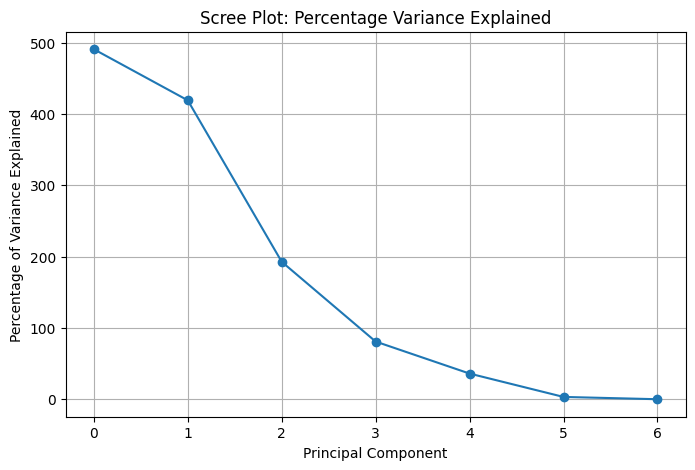

In [175]:
plt.figure(figsize=(8, 5))
plt.plot(Percentage_Variance, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Percentage of Variance Explained")
plt.title("Scree Plot: Percentage Variance Explained")
plt.grid()
plt.show()

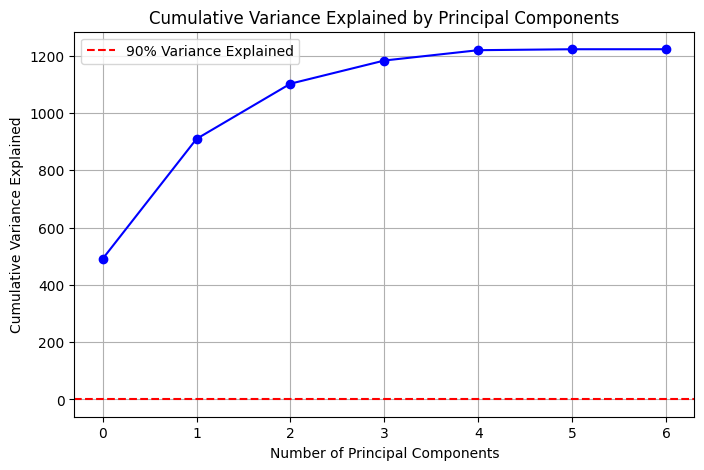

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Compute cumulative variance explained
Cumulative_Variance = np.cumsum(Percentage_Variance)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(Cumulative_Variance, marker='o', linestyle='-', color='b')

# Add reference line at 90% variance
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained by Principal Components")
plt.legend()
plt.grid()
plt.show()

In [177]:
# Select the first 4 principal component eigenvectors
eigenvectors2 = eigenvectors_corr[:, :4]
print("First 4 Eigenvectors of the Correlation Matrix:")
print(eigenvectors2)

First 4 Eigenvectors of the Correlation Matrix:
[[ 0.30219096 -0.00847289  0.33410693  0.48290443]
 [-0.64378667 -0.64910438  0.03435809  0.376847  ]
 [-0.62260719  0.69226847  0.2838292   0.02896707]
 [ 0.21242839  0.11128162  0.35948683  0.50041798]
 [ 0.06848339 -0.28962403  0.73791663 -0.54787098]
 [ 0.22694272  0.04002786 -0.22065738  0.12571195]
 [ 0.07253163  0.03857686  0.290158    0.23992979]]


From the above graph, we can observe after the seventh value, plot is stable. So key values can be taken as 1:4. From Variabilitycor we can observe range also

In [178]:
# Projecting the scaled data onto the first 4 principal components
PC1 = scaled_data @ eigenvectors2[:, 0]  # Projection onto PC1
PC2 = scaled_data @ eigenvectors2[:, 1]  # Projection onto PC2
PC3 = scaled_data @ eigenvectors2[:, 2]  # Projection onto PC3
PC4 = scaled_data @ eigenvectors2[:, 3]  # Projection onto PC4
PC = pd.DataFrame({"PC1": PC1, "PC2": PC2, "PC3": PC3, "PC4": PC4})
print(PC.head())

        PC1       PC2       PC3       PC4
0  0.582869 -0.025239  0.844586  0.095997
1  0.474635 -0.280543  0.784895  0.532255
2  0.634068 -0.105967  0.694522  0.538551
3  1.047920  0.275272  1.087658  0.656929
4  0.873258  0.052740  0.658673  0.318025


From the result we can observe the data of key components for all variables, In the first one, third one, fourth one all the values are related as all of them are positive.

Conclusion : Learnings - This dataset helped me learn about different types of crops, climatic conditions and land conditions we check for a particular plant to grow, I also came to know that certain plants only grow in few climatic conditions . And also I learned to visually represent some data we need to understand and we should be clear about what we need to present. And from matrix operations I came to know about difference between covariance and correlation.